<a href="https://colab.research.google.com/github/PaoBautista/Act3datasetTIA/blob/main/Actividad2_PaolaBautista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Nombre: Paola Bautista

# ACTIVIDAD 2: REDES NEURONALES CONVOLUCIONALES

---

En esta actividad, vamos a trabajar con Convolutional Neural Networks para resolver un problema de clasificación de imágenes. En particular, vamos a clasificar diez clases que incluyen fundamentalmente animales y vehículos.

Como las CNN profundas son un tipo de modelo bastante avanzado y computacionalmente costoso, se recomienda hacer la práctica en Google Colaboratory con soporte para GPUs. En [este enlace](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) se explica cómo activar un entorno con GPUs. *Nota: para leer las imágenes y estandarizarlas al mismo tamaño se usa la librería opencv. Esta ĺibrería está ya instalada en el entorno de Colab, pero si trabajáis de manera local tendréis que instalarla.*

<center><img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" style="text-align: center" height="300px"></center>

El dataset a utilizar consiste en 60000 imágenes a color de 10 clases de animales y vehículos. El dataset en cuestión se denomina [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) y es más complejo que el dataset MNIST que hemos utilizado en la actividad 1. Aunque tiene las mismas clases (10), los animales y vehículos pueden aparecer en distintas poses, en distintas posiciones de la imagen o con otros animales/ vehículos en pantalla (si bien el elemento a clasificar siempre aparece en la posición predominante).

## Carga de los datos

In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
import pandas as pd
import keras.datasets.cifar10 as cifar10

from tensorflow import keras
from keras.utils import to_categorical

In [2]:
# Primero, definimos los datos de entrenamiento, validación y prueba
(X, Y), (x_test, y_test) = cifar10.load_data()
(x_train, x_valid) = (X[:40000], X[40000:])
(y_train, y_valid) = (Y[:40000], Y[40000:])

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalizamos como de costumbre
x_train = x_train / 255.
x_valid = x_valid / 255.
x_test = x_test / 255.

In [4]:
# Esta variable contiene un mapeo de número de clase a elemento (animal o vehículo).
# La incluimos para ayudarte con la identificación de clases. De ti depende
# si quieres utilizar esta variable o no
MAP_ELEMENTS = {
    0: 'avion', 1: 'coche', 2: 'ave',
    3: 'gato', 4: 'ciervo', 5: 'perro', 6: 'rana',
    7: 'caballo', 8: 'barco', 9: 'camion'
}

In [5]:
# Función auxiliar para convertir las etiquetas a codificación one-hot
def convert_to_one_hot(labels, num_classes):
    return np.squeeze(np.array([to_categorical(label, num_classes=num_classes) for label in labels]))

# Convertimos las etiquetas de entrenamiento, validación y prueba
num_classes = 10
y_train_one_hot = convert_to_one_hot(y_train, num_classes)
y_valid_one_hot = convert_to_one_hot(y_valid, num_classes)
y_test_one_hot = convert_to_one_hot(y_test, num_classes)

# Verificamos las conversiones
print(y_train_one_hot.shape)
print(y_valid_one_hot.shape)
print(y_test_one_hot.shape)

(40000, 10)
(10000, 10)
(10000, 10)


## Ejercicio

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer una imagen de las incluidas en CIFAR-10 con la mayor accuracy posible. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en vuestro informe (no es necesario tratar todos ellos ni mucho menos, esto son ideas orientativas de aspectos que podéis explorar):

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes dan más problemas a nuestro modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, etc.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

Notas:
* Te recomendamos mantener los conjuntos de entrenamiento, test y prueba que se crean en el Notebook. No obstante, si crees que modificando tales conjuntos puedes lograr mejores resultados (o que puedes lograr los mismos resultados con menos datos, lo cual es también un logro), eres libre de hacerlo.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.

## Librerias importantes

In [6]:
#Librerías de uso
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [7]:
#Función para graficar el historial de entrenamiento
def plot_training_history(history, title):
    plt.figure(figsize=(12, 5))   # Gráfico de Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.title(f'Precisión del Modelo - {title}')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()
    plt.grid(True)    # Gráfico de Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title(f'Pérdida del Modelo - {title}')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## 1. Modelo con batch normalization

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)


Entrenamiento Modelo con BN (sin Dropout aún)

Precisión del Modelo con BN en el conjunto de prueba: 0.8084


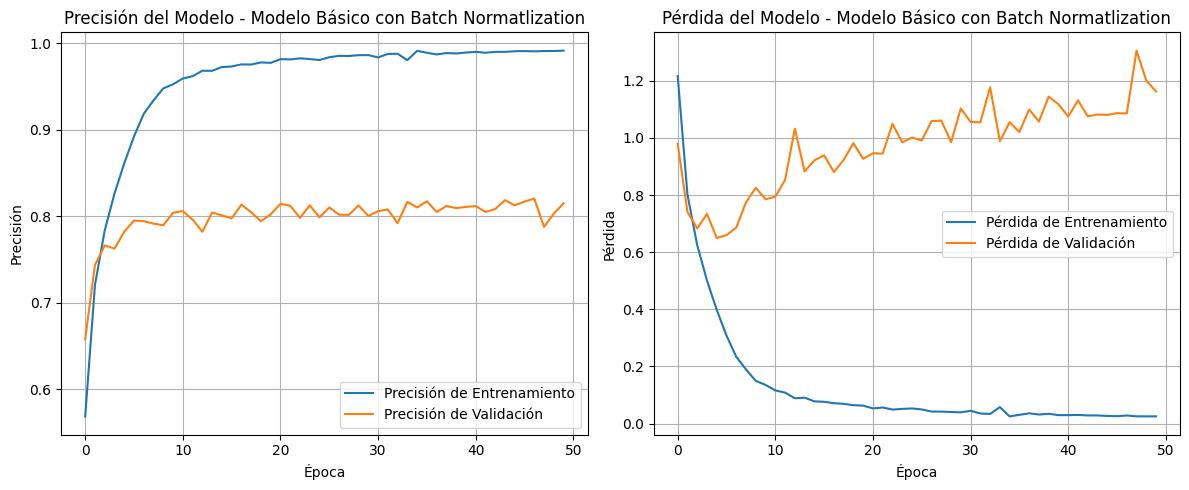

In [8]:
#Modelo usando solo batch normalization
model_with_bn = Sequential([
    # Bloque 1
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 2
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Bloque 3
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    # Capas Densas
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])

optimizer_bn = keras.optimizers.Adam(learning_rate=0.001)
model_with_bn.compile(optimizer=optimizer_bn, loss='categorical_crossentropy', metrics=['accuracy'])
model_with_bn.summary()

print("\nEntrenamiento Modelo con BN (sin Dropout aún)")
history_bn = model_with_bn.fit(x_train, y_train_one_hot, # SIN DATA AUGMENTATION
                               epochs=50,
                               validation_data=(x_valid, y_valid_one_hot),
                               verbose=0)

loss_bn, accuracy_bn = model_with_bn.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"\nPrecisión del Modelo con BN en el conjunto de prueba: {accuracy_bn:.4f}")

plot_training_history(history_bn, "Modelo Básico con Batch Normatlization")


## **Modelo CNN con Batch Normalization**
En este modelo se usó Batch Normalization (BN) en todas sus capas convolucionales y la primera capa densa. La BN acelera y estabiliza el entrenamiento, permitiendo que la red aprenda de manera más eficiente.

* **Arquitectura:** 3 bloques convolucionales (cada uno con 2x Conv2D y BatchNormalization, seguidos de MaxPooling2D), finalizando con capas Flatten y Dense. Se utilizó filtros 3x3 y activación ReLU.
  * **Conv2D:** detecta automáticamente patrones en las imágenes.
  * **MaxPooling2D:** reduce el tamaño de las detecciones haciendo el modelo robusto a pequeñas variaciones.
  * **Batch Normalization:** Estabiliza y acelera el entrenamiento de redes profundas normalizando las activaciones de las capas.

* **Optimizador:** Adam (learning_rate=0.001).
Función de Pérdida: categorical_crossentropy.
Entrenamiento: 50 épocas, sin Data Augmentation ni Dropout en esta fase.

**Resultados:**
* **Precisión en el Conjunto de Prueba:** 80.84%
* **Pérdida de Validación:** 1.2
* **Precisión de Validación:** 80%

Existe un ligero sobreajuste


## 2. Modelo con Batch Normalization y Dropout

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)


Entrenamiento Modelo con BN y Dropout (sin DA aún)

Precisión del Modelo con BN y Dropout en el conjunto de prueba: 0.8531


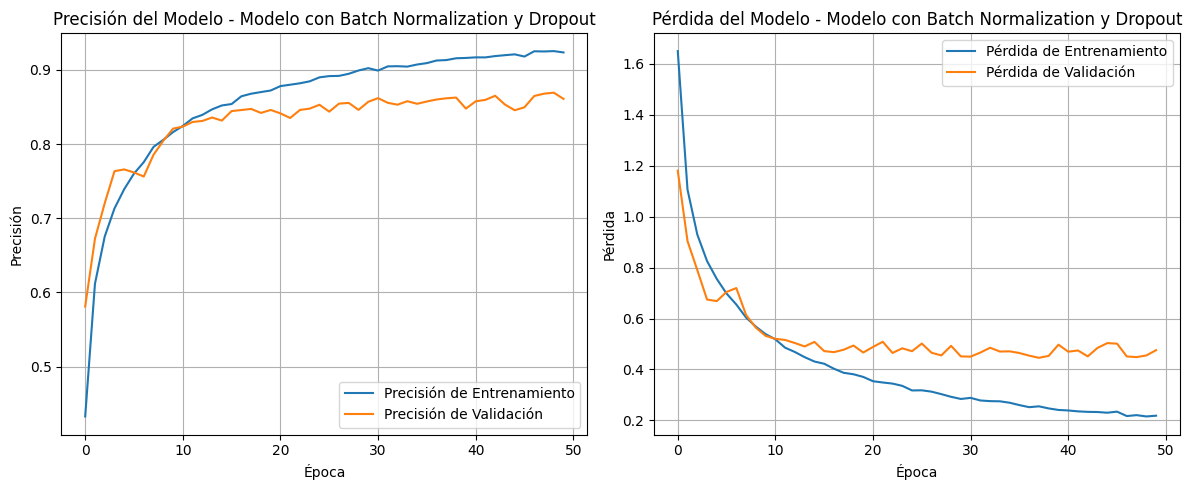

In [9]:
#MODELO CON BATCH NORMALIZATION Y DROPOUT
model_with_bn_dropout = Sequential([
    # Bloque 1
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Bloque 2
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Bloque 3
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Capas Densas
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

optimizer_bn_dropout = keras.optimizers.Adam(learning_rate=0.001)
model_with_bn_dropout.compile(optimizer=optimizer_bn_dropout, loss='categorical_crossentropy', metrics=['accuracy'])
model_with_bn_dropout.summary()

#ENTRENAMIENTO DEL MODELO CON BN Y DROPOUT (SIN DATA AUGMENTATION AÚN)
print("\nEntrenamiento Modelo con BN y Dropout (sin DA aún)")
history_bn_dropout = model_with_bn_dropout.fit(x_train, y_train_one_hot,
                                              epochs=50,
                                              validation_data=(x_valid, y_valid_one_hot),
                                              verbose=0)

loss_bn_dropout, accuracy_bn_dropout = model_with_bn_dropout.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"\nPrecisión del Modelo con BN y Dropout en el conjunto de prueba: {accuracy_bn_dropout:.4f}")

plot_training_history(history_bn_dropout, "Modelo con Batch Normalization y Dropout")

# Modelo CNN con Batch Normalization y Dropout
En este modelo añade capas de Dropout. El Dropout desactiva aleatoriamente neuronas durante el entrenamiento, lo que ayuda a reducir el sobreajuste.

* **Arquitectura:** 3 bloques convolucionales (2x Conv2D + BatchNormalization + MaxPooling2D + Dropout). Las tasas de Dropout se incrementan progresivamente (0.2, 0.3, 0.4) y se aplica un Dropout(0.5) en la capa densa final. Se utilzó filtros 3x3 y activación ReLU.
  * **Dropout**: Es la técnica de regularización que desactiva aleatoriamente neuronas durante el entrenamiento, forzando al modelo a aprender características y evita el sobreajuste.
* **Optimizador:** Adam (learning_rate=0.001).
* **Función de Pérdida:** categorical_crossentropy.
* **Entrenamiento:** 50 épocas, sin Data Augmentation en esta fase.

**Resultados**:

* **Precisión en el Conjunto de Prueba:** 85.31%
* **Pérdida de Validación:** 0.5
* **Precisión de Validación:** 87%

Acorde a los resultado, este modelo tiene menos sobreajuste y generaliza mejor

## 3. Modelo con BN, DP, Early Stopping y Data Argumentation


Configuración del ImageDataGenerator (SIMPLIFICADO PARA ÉXITO INICIAL)

 Construcción del Modelo CNN Óptimo


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)


 Entrenando el Modelo CNN Óptimo (con DA, BN, Dropout, Early Stopping)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.3106 - loss: 2.1809 - val_accuracy: 0.4982 - val_loss: 1.3930 - learning_rate: 0.0010
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 37ms/step - accuracy: 0.5109 - loss: 1.3557 - val_accuracy: 0.5809 - val_loss: 1.1857 - learning_rate: 0.0010
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5992 - loss: 1.1337 - val_accuracy: 0.6415 - val_loss: 1.0411 - learning_rate: 0.0010
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6515 - loss: 0.9890 - val_accuracy: 0.7035 - val_loss: 0.8386 - learning_rate: 0.0010
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.6849 - loss: 0.9033 - val_accuracy: 0.7311 - val_loss: 0.7745 - learning_rate: 0.0010
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.7088 - loss: 0.8319 - val_accuracy: 0.7440 - val_loss: 0.7366 - learning_rate: 0.0010
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7361 - loss: 0.7779

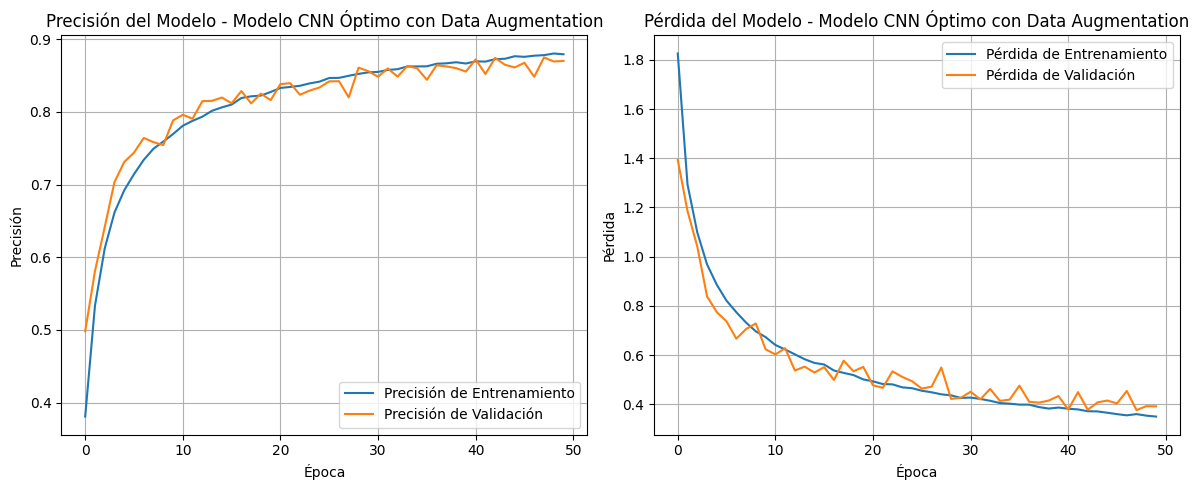


Métricas por Clase y Matriz de Confusión
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [22]:
print("\nConfiguración del ImageDataGenerator (SIMPLIFICADO PARA ÉXITO INICIAL)")
datagen_optimal = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.05,
    height_shift_range=0.05,
    fill_mode='nearest'
)
datagen_optimal.fit(x_train)

#Construcción del Modelo CNN Óptimo (Batch Norm + Dropout)
print("\n Construcción del Modelo CNN Óptimo")
optimal_cnn_model = Sequential([
    # Bloque 1
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Bloque 2
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    # Bloque 3
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    # Capas Densas (Clasificador)
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

#Compilación del modelo
optimizer = keras.optimizers.Adam(learning_rate=0.001)
optimal_cnn_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
optimal_cnn_model.summary()

#Callbacks para un entrenamiento robusto
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True, verbose=1)
reduce_lr_on_plateau_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001, verbose=1)
callbacks_list = [early_stopping_callback, reduce_lr_on_plateau_callback]

#Entrenamiento del Modelo Óptimo con Data Augmentation y Callbacks
print("\n Entrenando el Modelo CNN Óptimo (con DA, BN, Dropout, Early Stopping)")
history_optimal_cnn = optimal_cnn_model.fit(datagen_optimal.flow(x_train, y_train_one_hot, batch_size=64),
                                            epochs=50, # Número alto de épocas, EarlyStopping lo detendrá
                                            validation_data=(x_valid, y_valid_one_hot),
                                            callbacks=callbacks_list,
                                            verbose=1)

# Evaluación Final del Modelo Óptimo
print("\nEvaluación Final del Modelo Óptimo")
loss_optimal_cnn, accuracy_optimal_cnn = optimal_cnn_model.evaluate(x_test, y_test_one_hot, verbose=0)
print(f"\nPrecisión del Modelo CNN Óptimo en el conjunto de prueba: {accuracy_optimal_cnn:.4f}")

#Análisis Detallado del Modelo Óptimo
print("\nAnálisis Detallado del Modelo CNN Óptimo")
plot_training_history(history_optimal_cnn, "Modelo CNN Óptimo con Data Augmentation")

print("\nMétricas por Clase y Matriz de Confusión")
y_pred_probs = optimal_cnn_model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_one_hot, axis=1)



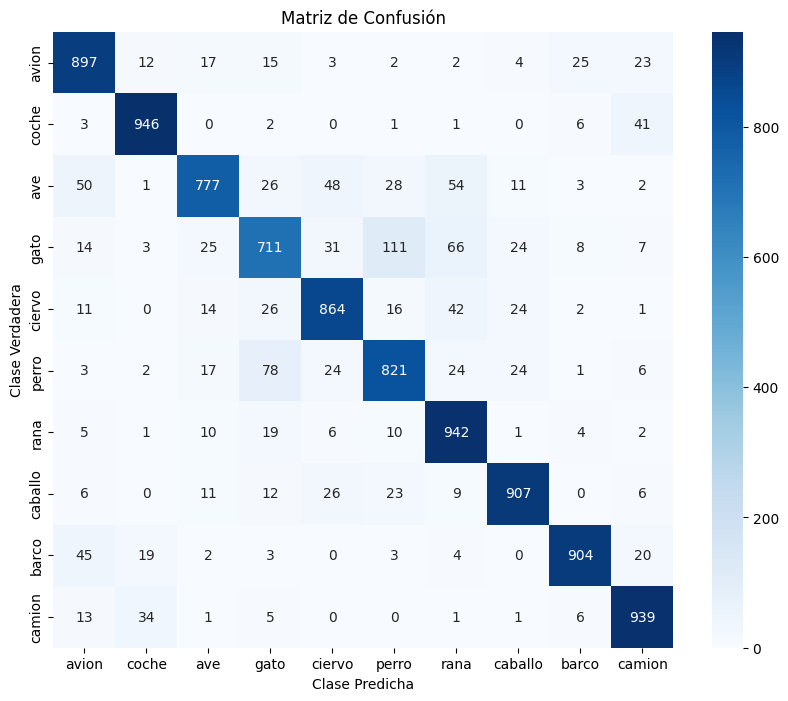

In [15]:
#Matriz de Confusión
class_names = list(MAP_ELEMENTS.values())
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')
plt.title('Matriz de Confusión')
plt.show()


## Modelo con BN, DP, Early Stopping y Data Argumentation
Por medio de investigación, en este modelo combina una arquitectura CNN profunda con las técnicas de regularización y optimización más efectivas.

* **Arquitectura:** 3 bloques convolucionales (cada uno con 2x Conv2D y BatchNormalization, seguidos de MaxPooling2D y Dropout). La capa final es densa con BatchNormalization y Dropout. Se utilizó filtros 3x3 con activación ReLU.
* Aumento de Datos (ImageDataGenerator): Aplicado en tiempo real durante el entrenamiento con volteo horizontal (horizontal_flip=True) y desplazamientos de ancho y alto (width_shift_range=0.05, height_shift_range=0.05), para aumentar el conjunto de entrenamiento y mejorar la generalización. **Esto fue consultado debido a que no se tenía conocimiento previo y fue un gran hallazgo por lo que fue de gran ayuda**.
* **Optimizador:** Adam (learning_rate=0.001).
* **Función de Pérdida:** categorical_crossentropy.
* **Entrenamiento:** 50 épocas máximas, con EarlyStopping (paciencia 25) y ReduceLROnPlateau (paciencia 10) para detener el entrenamiento óptimamente y ajustar la tasa de aprendizaje.

**Resultados:**

* **Precisión en el Conjunto de Prueba:** 87.08%
* **Pérdida de Validación:** 0.4
* **Precisión de Validación:** 88%

# ¡MODELO GANADOR!
La combinación de Data Augmentation, Batch Normalization y Dropout permite que este modelo alcance el mejor rendimiento. Data Augmentation previene el sobreajuste al diversificar los datos, mientras que Batch Normalization y Dropout aseguran un entrenamiento estable y una generalización superior. Este modelo representa el balance óptimo entre complejidad y robustez.


Visualización de Múltiples Predicciones y su Exactitud


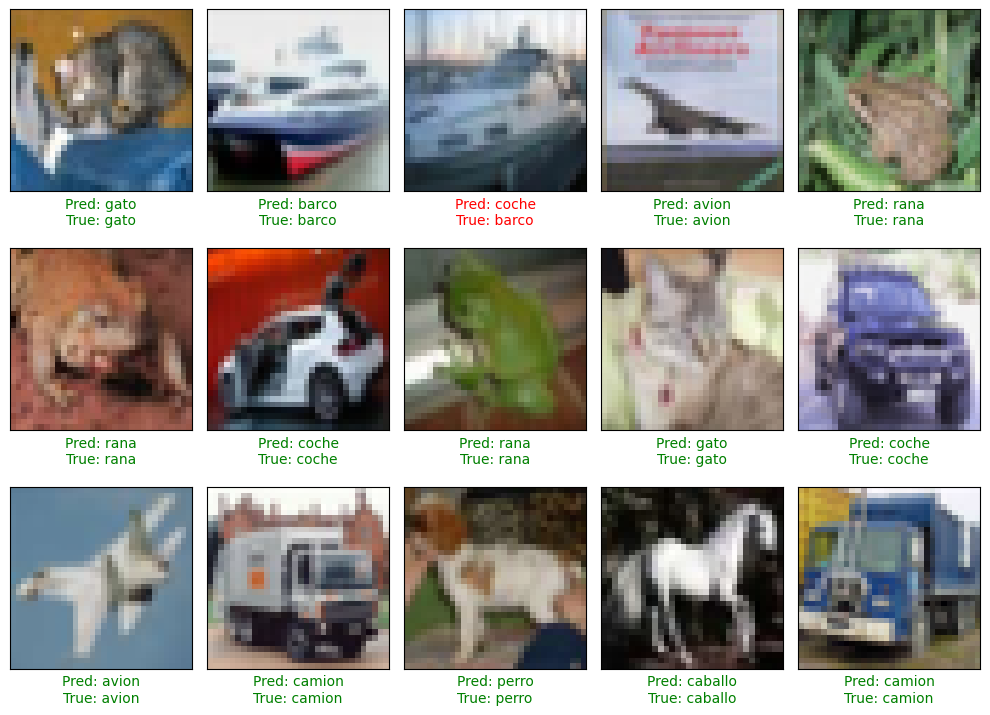

In [21]:
#Comparación
from sklearn.metrics import classification_report
# 2. Recopilar métricas para el gráfico
classes = []
precision_scores = []
recall_scores = []
f1_scores = []

report = classification_report(y_true_classes, y_pred_classes,
                               target_names=class_names, output_dict=True)


print("\nVisualización de Múltiples Predicciones y su Exactitud")

num_images_to_show = 15 # Puedes cambiar este número

#Dimensiones
num_rows = int(np.sqrt(num_images_to_show))
num_cols = int(np.ceil(num_images_to_show / num_rows))


plt.figure(figsize=(num_cols * 2, num_rows * 2.5))

for i in range(num_images_to_show):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])

    predicted_label = y_pred_classes[i]
    true_label = y_true_classes[i]

    color = 'green' if predicted_label == true_label else 'red'

    try:
        predicted_name = MAP_ELEMENTS[predicted_label]
        true_name = MAP_ELEMENTS[true_label]
    except KeyError:
        predicted_name = f"Clase {predicted_label}"
        true_name = f"Clase {true_label}"


    plt.xlabel(f"Pred: {predicted_name}\nTrue: {true_name}", color=color)

plt.tight_layout()
plt.show()
